In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

def load_data(filename):
  data_file = open(filename, 'r')  # Open File "to read"
  data = []
  for index, line in enumerate(data_file):
    data_tep = line.split(',')
    data.append(list(np.int_(data_tep)))
  return np.array(data,dtype=int).reshape((-1,10))

In [ ]:
test_data = ("/content/drive/My Drive/2020_FALL/CSCE633/HomeWork/HW04/hw4_test.csv")
train_data = ("/content/drive/My Drive/2020_FALL/CSCE633/HomeWork/HW04/hw4_train.csv")
test_data = load_data(test_data)
train_data = load_data(train_data)

#(1) Data exploration

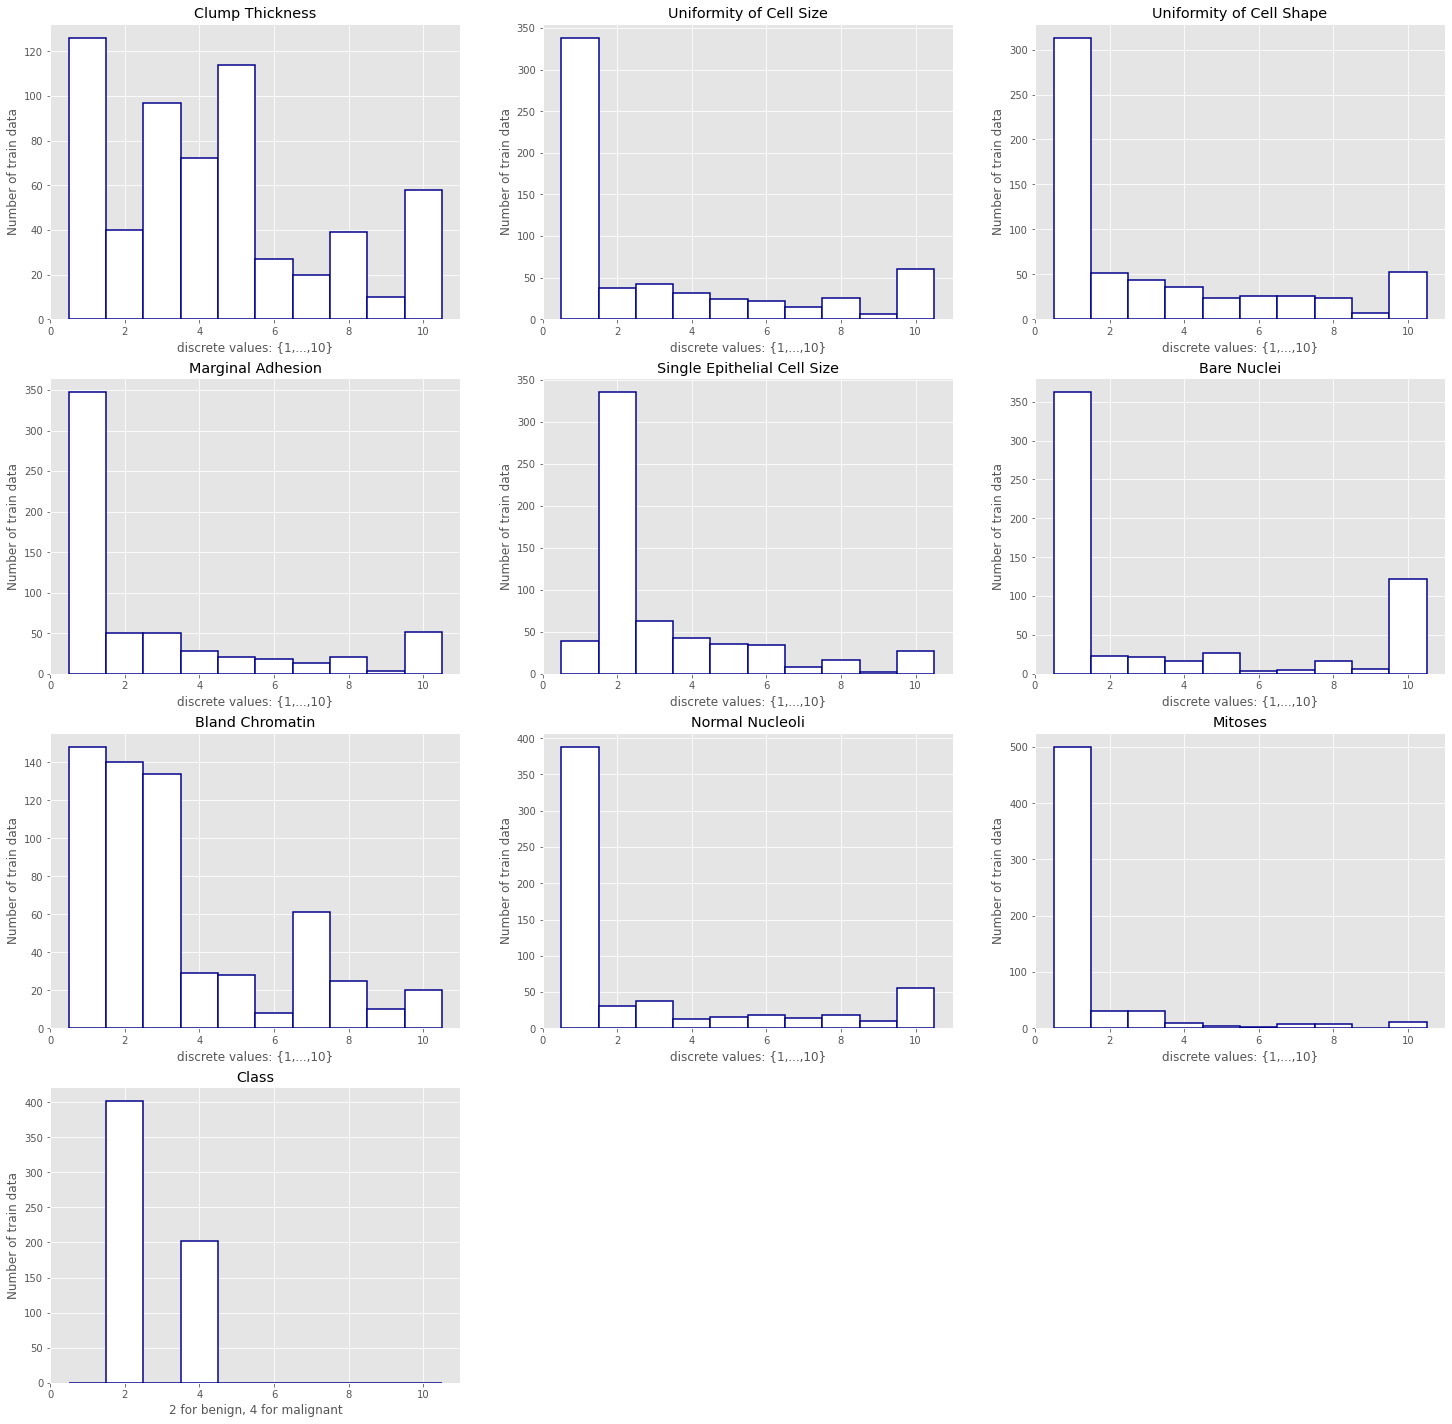

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

NameMap = {1:'Clump Thickness',
           2:'Uniformity of Cell Size',
           3:'Uniformity of Cell Shape',
           4:'Marginal Adhesion',
           5:'Single Epithelial Cell Size',
           6:'Bare Nuclei',
           7:'Bland Chromatin',
           8:'Normal Nucleoli',
           9:'Mitoses',
           10:'Class'}

def funcPlot(data_set):
  plt.style.use('ggplot')
  fig = plt.figure(figsize=[25,25])
  for i in range(10):
    a = fig.add_subplot(4,3,i+1)
    x = data_set[0::1,i]
    _ = plt.hist(x, bins=np.linspace(0.5,10.5,11), color = 'w',ec = 'darkblue',lw=1.5)

    if i !=9:
      plt.xlabel('discrete values: {1,...,10}')
    else:
      plt.xlabel('2 for benign, 4 for malignant') 

    plt.ylabel('Number of train data')
    a.set_title(NameMap[i+1])      
  plt.show()

funcPlot(train_data)

In [ ]:
unique, count = np.unique(train_data[0::1,-1], return_counts=True, axis=0)
print('n_benign:{},n_malign:{},n_tol:{}'.format(count[0],
                                                count[1],
                                                train_data.shape[0]))

n_benign:401,n_malign:202,n_tol:603


#(2) Conditional entropy

In [ ]:
##Conditional Entropy
def cEntropy1(Y,X):
  XY = np.c_[X,Y]
  unique, count = np.unique(XY, return_counts=True, axis=0)
  total_num = sum(count)

  condtion_entorpy = np.zeros(10)
  for i in range(10):
    index = np.nonzero(unique[0::1,0]==i+1)
    if index[0].size !=0:
      x_subnum = sum(count[index])
      #print(i+1,index[0])
      Pyx = count[index]/x_subnum
      #print(count[index]/sum(count[index]))
      #print(Pyx.dot(np.log(Pyx).T),sum(count[index])/sum(count))
      condtion_entorpy[i] = -Pyx.dot(np.log(Pyx).T)* (x_subnum/total_num)
  return sum(condtion_entorpy)

In [ ]:
##Entropy
def entropy(Y):
    """
    Also known as Shanon Entropy
    Reference: https://en.wikipedia.org/wiki/Entropy_(information_theory)
    """
    unique, count = np.unique(Y, return_counts=True, axis=0)
    prob = count/len(Y)
    en = np.sum((-1)*prob*np.log(prob))
    return en


#Joint Entropy
def jEntropy(Y,X):
    """
    H(Y;X)
    Reference: https://en.wikipedia.org/wiki/Joint_entropy
    """
    YX = np.c_[Y,X]
    return entropy(YX)

#Conditional Entropy
def cEntropy2(Y, X):
    """
    conditional entropy = Joint Entropy - Entropy of X
    H(Y|X) = H(Y;X) - H(X)
    Reference: https://en.wikipedia.org/wiki/Conditional_entropy
    """
    return jEntropy(Y, X) - entropy(X)


# #Information Gain
# def gain(Y, X):
#     """
#     Information Gain, I(Y;X) = H(Y) - H(Y|X)
#     Reference: https://en.wikipedia.org/wiki/Information_gain_in_decision_trees#Formal_definition
#     """
#     return entropy(Y) - cEntropy(Y,X)

In [ ]:
Y = train_data[0::1,-1]

ce1 = np.zeros(9)
ce2 = np.zeros(9)
for i in range(9):
  X = train_data[0::1,i]
  ce1[i] = cEntropy1(Y,X)
  ce2[i] = cEntropy2(Y, X)
print(ce1)
print(ce2)
#print(NameMap[ce1.argmin()+1],ce1.min())
min3_index = ce1.argsort()[0:3]
for ind in min3_index:
  print(NameMap[ind+1],ce1[ind])
#print(NameMap[ce1.argmax()+1],ce1.max())
#print(ce[0]/ce1[0])

[0.32849172 0.14602451 0.1620714  0.2941173  0.26541363 0.19095501
 0.23870233 0.30680583 0.48587901]
[0.32849172 0.14602451 0.1620714  0.2941173  0.26541363 0.19095501
 0.23870233 0.30680583 0.48587901]
Uniformity of Cell Size 0.14602451066410996
Uniformity of Cell Shape 0.1620714007513602
Bare Nuclei 0.1909550109027593


#(3) Decision Tree Classification

In [ ]:
# from sklearn import tree
# from sklearn.model_selection import cross_validate

# X = train_data[0::1,0:9]
# Y = train_data[0::1,-1]
# best_depth = np.zeros(100,dtype=int)
# cv_results = np.zeros((100,21,5))

# #Tune Process
# for i in range(100):
#   max_depth = np.linspace(1,20,21).astype(int)
#   for ind,md in enumerate(max_depth):
#     clf = tree.DecisionTreeClassifier(max_depth=md)
#     cv_results[i,ind,:] = cross_validate(clf, X, Y, scoring='accuracy',cv=5)['test_score']
#     #print(np.mean(cv_results['test_score']))
#   #print(cv_results)
#   cv_acc = np.mean(cv_results[i],axis=1)
#   best_depth[i] = cv_acc.argmax()
#   #print(cv_acc)
# print(np.unique(best_depth,return_counts=True))
# print(np.mean(cv_results,axis=2))
# print(np.max(np.mean(cv_results,axis=2)))

In [ ]:
from sklearn import tree
from sklearn.model_selection import cross_validate

X = train_data[0::1,0:9]
Y = train_data[0::1,-1]

cv_results = np.zeros((20,5))
acc_ave = np.zeros(20)

#Tune Process
max_depth = np.linspace(1,20,20).astype(int)
for ind,md in enumerate(max_depth):
  clf = tree.DecisionTreeClassifier(max_depth=md)
  cv_results[ind,:] = cross_validate(clf, X, Y, scoring='accuracy',cv=5)['test_score']
  #print(np.mean(cv_results['test_score']))
  #print(cv_results)
  acc_ave[ind] = np.mean(cv_results[ind])
best_depth = max_depth[acc_ave.argmax()]

In [ ]:
for i in range(20):
  print('{}&{}&{}&{}&{}&{}&{}\\\\'.format(i+1,
                                          round(cv_results[i,0],8),
                                       round(cv_results[i,1],8),
                                       round(cv_results[i,2],8),
                                       round(cv_results[i,3],8),
                                       round(cv_results[i,4],8),
                                       round(acc_ave[i],8)))
print(best_depth,acc_ave.argmax(),acc_ave.max(),max_depth)

1&0.90909091&0.95041322&0.90909091&0.96666667&0.89166667&0.92538567\\
2&0.95867769&0.94214876&0.96694215&0.975&0.975&0.96355372\\
3&0.94214876&0.9338843&0.95041322&0.99166667&0.975&0.95862259\\
4&0.96694215&0.9338843&0.95041322&0.975&0.975&0.96024793\\
5&0.96694215&0.95041322&0.94214876&0.975&0.96666667&0.96023416\\
6&0.92561983&0.94214876&0.90909091&0.975&0.96666667&0.94370523\\
7&0.95867769&0.9338843&0.90909091&0.98333333&0.93333333&0.94366391\\
8&0.94214876&0.94214876&0.91735537&0.975&0.93333333&0.94199725\\
9&0.95867769&0.94214876&0.91735537&0.975&0.96666667&0.9519697\\
10&0.9338843&0.9338843&0.90909091&0.98333333&0.96666667&0.9453719\\
11&0.96694215&0.94214876&0.90909091&0.96666667&0.93333333&0.94363636\\
12&0.95041322&0.94214876&0.9338843&0.98333333&0.96666667&0.95528926\\
13&0.94214876&0.9338843&0.91735537&0.975&0.975&0.94867769\\
14&0.94214876&0.9338843&0.90909091&0.96666667&0.94166667&0.93869146\\
15&0.95867769&0.94214876&0.91735537&0.98333333&0.96666667&0.95363636\\
16&0.9586

In [ ]:
X_train = train_data[0::1,0:9]
Y_train = train_data[0::1,-1]
X_test = test_data[0::1,0:9]
Y_test = test_data[0::1,-1]

acc1 = np.zeros(100)
for i in range(len(acc1)):
  clf = tree.DecisionTreeClassifier(max_depth=2)
  clf.fit(X_train,Y_train)
  acc1[i] = clf.score(X_test,Y_test)
print(np.mean(acc1),np.std(acc1))

0.8875 0.0


#(4) Random forest tree classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
import numpy as np

X = train_data[0::1,0:9]
Y = train_data[0::1,-1]

best_ne_md = np.zeros(2,dtype=int)
cv_results = np.zeros((5,6,5))
acc_ave = np.zeros((5,6))

n_estimators = np.linspace(10,30,5).astype(int)#number of trees
max_depth = np.linspace(3,8,6).astype(int)     #depth of trees

for jnd,ne in enumerate(n_estimators):
  for ind,md in enumerate(max_depth):
    clf = RandomForestClassifier(n_estimators=ne,max_depth=md)
    cv_results[jnd,ind,:] = cross_validate(clf, X, Y, scoring='accuracy',cv=5)['test_score']
    print(jnd,ind,cv_results[jnd,ind,:])
    #print(cv_results)
    acc_ave[jnd,ind] = np.mean(cv_results[jnd,ind])
#cv_acc = np.mean(cv_results,axis=2)
#print(cv_acc)
  #print(cv_acc)
  #print(cv_acc.argmax(),cv_acc.max(),max_depth[cv_acc.argmax()])
#clf = clf.fit(X, Y)

0 0 [0.96694215 0.92561983 0.97520661 0.98333333 0.99166667]
0 1 [0.98347107 0.9338843  0.95867769 0.99166667 1.        ]
0 2 [0.95867769 0.94214876 0.96694215 0.98333333 0.99166667]
0 3 [0.95867769 0.94214876 0.95867769 0.975      1.        ]
0 4 [0.96694215 0.92561983 0.9338843  0.98333333 1.        ]
0 5 [0.95041322 0.94214876 0.94214876 0.975      0.98333333]
1 0 [0.95867769 0.92561983 0.96694215 0.98333333 0.98333333]
1 1 [0.97520661 0.9338843  0.97520661 0.98333333 0.99166667]
1 2 [0.97520661 0.94214876 0.95041322 0.98333333 1.        ]
1 3 [0.96694215 0.94214876 0.95867769 0.98333333 1.        ]
1 4 [0.98347107 0.94214876 0.97520661 0.98333333 0.99166667]
1 5 [0.96694215 0.94214876 0.95867769 0.975      1.        ]
2 0 [0.96694215 0.9338843  0.95867769 0.98333333 1.        ]
2 1 [0.97520661 0.9338843  0.95867769 0.98333333 1.        ]
2 2 [0.97520661 0.94214876 0.96694215 0.98333333 0.99166667]
2 3 [0.97520661 0.9338843  0.95867769 0.98333333 0.98333333]
2 4 [0.97520661 0.933884

In [ ]:
from numpy import unravel_index
#ne,md = unravel_index(cv_acc.argmax(), cv_acc.shape)
#cv_acc[ne,md]
ne,md = unravel_index(acc_ave.argmax(), acc_ave.shape)
best_ne_md = [n_estimators[ne],max_depth[md]]

In [ ]:
import itertools
for i,j in itertools.product(range(5),range(6)):
  print('{}&{}&{}&{}&{}&{}&{}&{}\\\\'.format((i+2)*5,
                                             j+3,
                                          round(cv_results[i,j,0],6),
                                       round(cv_results[i,j,1],6),
                                       round(cv_results[i,j,2],6),
                                       round(cv_results[i,j,3],6),
                                       round(cv_results[i,j,4],6),
                                       round(acc_ave[i,j],6)))
print(best_depth,acc_ave.argmax(),acc_ave.max(),max_depth)
print(best_ne_md,ne,md)
print(acc_ave.max(),acc_ave[ne,md])

10&3&0.966942&0.92562&0.975207&0.983333&0.991667&0.968554\\
10&4&0.983471&0.933884&0.958678&0.991667&1.0&0.97354\\
10&5&0.958678&0.942149&0.966942&0.983333&0.991667&0.968554\\
10&6&0.958678&0.942149&0.958678&0.975&1.0&0.966901\\
10&7&0.966942&0.92562&0.933884&0.983333&1.0&0.961956\\
10&8&0.950413&0.942149&0.942149&0.975&0.983333&0.958609\\
15&3&0.958678&0.92562&0.966942&0.983333&0.983333&0.963581\\
15&4&0.975207&0.933884&0.975207&0.983333&0.991667&0.97186\\
15&5&0.975207&0.942149&0.950413&0.983333&1.0&0.97022\\
15&6&0.966942&0.942149&0.958678&0.983333&1.0&0.97022\\
15&7&0.983471&0.942149&0.975207&0.983333&0.991667&0.975165\\
15&8&0.966942&0.942149&0.958678&0.975&1.0&0.968554\\
20&3&0.966942&0.933884&0.958678&0.983333&1.0&0.968567\\
20&4&0.975207&0.933884&0.958678&0.983333&1.0&0.97022\\
20&5&0.975207&0.942149&0.966942&0.983333&0.991667&0.97186\\
20&6&0.975207&0.933884&0.958678&0.983333&0.983333&0.966887\\
20&7&0.975207&0.933884&0.958678&0.983333&1.0&0.97022\\
20&8&0.966942&0.933884&0.95

In [ ]:
X_train = train_data[0::1,0:9]
Y_train = train_data[0::1,-1]
X_test = test_data[0::1,0:9]
Y_test = test_data[0::1,-1]

acc2 = np.zeros(100)
for i in range(len(acc2)):
  clf = RandomForestClassifier(n_estimators=best_ne_md[0],
                               max_depth=best_ne_md[1])
  clf.fit(X_train,Y_train)
  acc2[i] = clf.score(X_test,Y_test)
print(np.mean(acc2),np.std(acc2))

0.9051250000000002 0.019692558873848777


In [32]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
pip install pandas

In [49]:
import pandas as pd
dat3 = pd.read_csv('/content/drive/My Drive/2020_FALL/Research/RL/LiteratReview/group4_new_175.csv') # a dataframe has two columns, named "state" and "action".

In [132]:
print(dat3)

      state  action
0         0       0
1         1       0
2         2       0
3         3       0
4         4       0
...     ...     ...
3355     43       1
3356     43       1
3357     43       1
3358     43       0
3359     44       0

[3360 rows x 2 columns]


In [154]:
import numpy as np
import random


Kfold = 10
def KfoldData(Kfold,nbus = 48,time = 70,data = dat3,seed=0):
  data = np.array(dat3)
  Kfold = int(Kfold)
  index_bus = np.arange(nbus,dtype=int)
  random.seed(seed)
  random.shuffle(index_bus)
  ones_array = np.ones((1,time),dtype=int)
  arange_array = np.arange(time,dtype=int)
  data_sub = []
  nbus_sub = []
  for i in range(Kfold):
    index_tep = np.reshape(time * index_bus[i::Kfold].reshape((-1,1)) *\
                           ones_array+ arange_array,(1,-1))[0]
    #print(index_tep)
    numpy_data = np.delete(data,index_tep,axis=0)
    df = pd.DataFrame(data=numpy_data, columns=["state", "action"])
    data_sub.append(df)
    nbus_sub.append(int(df.shape[0]/time))
  return data_sub,nbus_sub

In [157]:
data_sub,nbus_sub = KfoldData(Kfold,nbus = 48,time = 70,data = data,seed=0)
print(data_sub[0])

      state  action
0         0       0
1         1       0
2         2       0
3         3       0
4         4       0
...     ...     ...
3005     43       1
3006     43       1
3007     43       1
3008     43       0
3009     44       0

[3010 rows x 2 columns]
